# Feature Selection

Feature selection is the process of identifying and selecting a subset of input features that are most relevant to the target variable.

Feature selection is often straightforward when working with real-valued input and output data, such as using the Pearson’s correlation coefficient, but can be challenging when working with numerical input data and a categorical target variable.

The two most commonly used feature selection methods for numerical input data when the target variable is categorical (e.g. classification predictive modeling) are:

- ANOVA-f Statistic.
- Mutual Information Statistics.

### ANOVA f-test (Attack Model)

ANOVA is an acronym for “analysis of variance” and is a parametric statistical hypothesis test for determining whether the means from two or more samples of data (often three or more) come from the same distribution or not.

An F-statistic, or F-test, is a class of statistical tests that calculate the ratio between variances values, such as the variance from two different samples or the explained and unexplained variance by a statistical test, like ANOVA. The ANOVA method is a type of F-statistic referred to here as an ANOVA f-test.

Importantly, ANOVA is used when one variable is numeric and one is categorical, such as numerical input variables and a classification target variable in a classification task.

The results of this test can be used for feature selection where those features that are independent of the target variable can be removed from the dataset.

"When the outcome is numeric, and […] the predictor has more than two levels, the traditional ANOVA F-statistic can be calculated." — Page 242, Feature Engineering and Selection, 2019.

**The scikit-learn machine library provides an implementation of the ANOVA f-test in the *f_classif()* function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class.**

In [31]:
import pandas as pd

df = pd.read_csv('./df.csv')

X = df.iloc[:, :-2]
y = df.iloc[:,-2].apply(lambda y: 0 if y > 10 else 1)

In [32]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
    
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [33]:
dic = {}

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %s %f' % (i+1,df.columns[i], fs.scores_[i]))
    dic[df.columns[i]] = fs.scores_[i]

Feature 1: posicao_relativa 2.542500
Feature 2: distancia 71.455804
Feature 3: altitude_blue 20.888212
Feature 4: altitude_red 6.468142
Feature 5: velocidade_blue 2.769417
Feature 6: velocidade_red 0.116010
Feature 7: blue_rwr 2.869926
Feature 8: red_rwr 1138.845306
Feature 9: missil_blue_a 67.539712
Feature 10: missil_blue_b 32.956473
Feature 11: missil_blue_c 197.674793
Feature 12: missil_est_red_a 0.186071
Feature 13: missil_est_red_b 0.576515
Feature 14: missil_est_red_c 0.106524
Feature 15: missil_red_a 11.304604
Feature 16: missil_red_b 7.390415
Feature 17: missil_red_c 36.375822
Feature 18: missil_est_blue_a 1.367845
Feature 19: missil_est_blue_b 2.039896
Feature 20: missil_est_blue_c 6.706839
Feature 21: shotphi_blue_s 368.467076
Feature 22: shotphi_blue_m 0.206590
Feature 23: shotphi_blue_l 338.600122
Feature 24: shotphi_est_red_s 0.164204
Feature 25: shotphi_est_red_m 0.001296
Feature 26: shotphi_est_red_l 0.132043
Feature 27: shotphi_red_s 134.147122
Feature 28: shotphi_red_

In [34]:
import pandas as pd
scores = pd.DataFrame(dic.items(),columns = ['feature', 'score'])    
scores = scores.sort_values('score',ascending=False)

scores

,feature,score
7,red_rwr,1138.845306
20,shotphi_blue_s,368.467076
22,shotphi_blue_l,338.600122
10,missil_blue_c,197.674793
28,shotphi_red_l,176.625744
26,shotphi_red_s,134.147122
1,distancia,71.455804
8,missil_blue_a,67.539712
29,shotphi_est_blue_s,53.390120
16,missil_red_c,36.375822


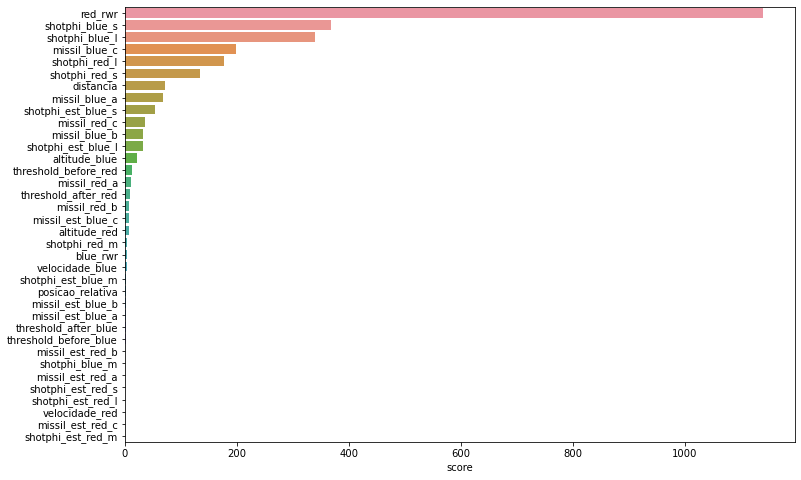

In [35]:
import seaborn as sns

# plot the scores
plt.figure(figsize=(12,8))
sns.barplot(x=scores['score'],y=[i for i in scores['feature']],orient='horizontal' );

In this case, we can see that some features stand out as perhaps being more relevant than others, with much larger test statistic values.

A bar chart of the feature importance scores for each input feature is created.

### Mutual Information (Attack Model)

Mutual information from the field of information theory is the application of information gain (typically used in the construction of decision trees) to feature selection.

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Mutual information is straightforward when considering the distribution of two discrete (categorical or ordinal) variables, such as categorical input and categorical output data. Nevertheless, it can be adapted for use with numerical input and categorical output.

For technical details on how this can be achieved, see the 2014 paper titled “Mutual Information between Discrete and Continuous Data Sets.” (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3929353/)

**The scikit-learn machine learning library provides an implementation of mutual information for feature selection with numeric input and categorical output variables via the *mutual_info_classif()* function. Like *f_classif()*, it can be used in the *SelectKBest* feature selection strategy (and other strategies).**

In [36]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
     
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [37]:
dic = {}

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %s %f' % (i+1,df.columns[i], fs.scores_[i]))
    dic[df.columns[i]] = fs.scores_[i]

Feature 1: posicao_relativa 0.002514
Feature 2: distancia 0.008984
Feature 3: altitude_blue 0.000000
Feature 4: altitude_red 0.002267
Feature 5: velocidade_blue 0.000805
Feature 6: velocidade_red 0.007925
Feature 7: blue_rwr 0.000000
Feature 8: red_rwr 0.091155
Feature 9: missil_blue_a 0.008599
Feature 10: missil_blue_b 0.005573
Feature 11: missil_blue_c 0.014806
Feature 12: missil_est_red_a 0.000000
Feature 13: missil_est_red_b 0.000580
Feature 14: missil_est_red_c 0.001868
Feature 15: missil_red_a 0.003992
Feature 16: missil_red_b 0.000000
Feature 17: missil_red_c 0.006930
Feature 18: missil_est_blue_a 0.000346
Feature 19: missil_est_blue_b 0.001804
Feature 20: missil_est_blue_c 0.005146
Feature 21: shotphi_blue_s 0.030129
Feature 22: shotphi_blue_m 0.003748
Feature 23: shotphi_blue_l 0.028166
Feature 24: shotphi_est_red_s 0.000000
Feature 25: shotphi_est_red_m 0.001115
Feature 26: shotphi_est_red_l 0.000000
Feature 27: shotphi_red_s 0.006705
Feature 28: shotphi_red_m 0.000000
Featur

In [38]:
import pandas as pd
scores = pd.DataFrame(dic.items(),columns = ['feature', 'score'])    
scores = scores.sort_values('score',ascending=False)

scores

,feature,score
7,red_rwr,0.091155
20,shotphi_blue_s,0.030129
22,shotphi_blue_l,0.028166
28,shotphi_red_l,0.016007
10,missil_blue_c,0.014806
31,shotphi_est_blue_l,0.009256
1,distancia,0.008984
8,missil_blue_a,0.008599
5,velocidade_red,0.007925
16,missil_red_c,0.006930


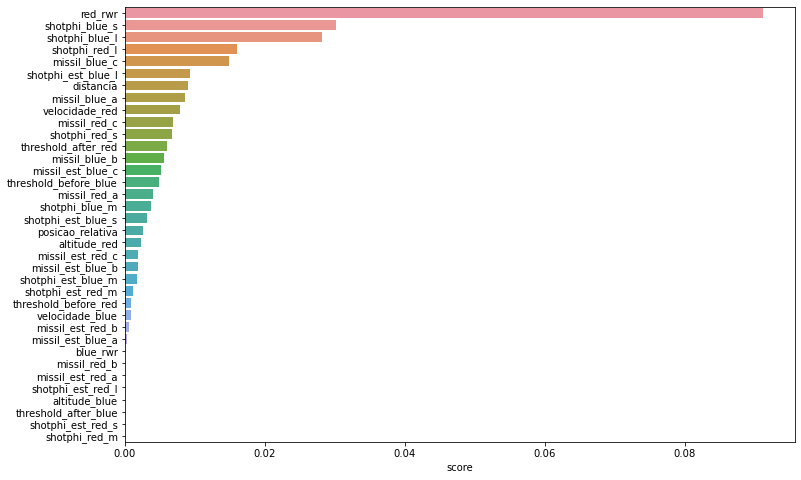

In [39]:
import seaborn as sns

# plot the scores
plt.figure(figsize=(12,8))
sns.barplot(x= scores['score'],y=[i for i in scores['feature']],orient='horizontal' );

### ANOVA f-test (Defense Model)

In [42]:
import pandas as pd

df = pd.read_csv('./df.csv')

X = df.iloc[:, :-2]
y = df.iloc[:,-1].apply(lambda y: 0 if y > 10 else 1)

In [43]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
    
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [44]:
dic = {}

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %s %f' % (i+1,df.columns[i], fs.scores_[i]))
    dic[df.columns[i]] = fs.scores_[i]

Feature 1: posicao_relativa 4.781743
Feature 2: distancia 58.204092
Feature 3: altitude_blue 5.119203
Feature 4: altitude_red 18.434176
Feature 5: velocidade_blue 0.197726
Feature 6: velocidade_red 4.245877
Feature 7: blue_rwr 1126.324176
Feature 8: red_rwr 1.337776
Feature 9: missil_blue_a 9.101433
Feature 10: missil_blue_b 2.319630
Feature 11: missil_blue_c 20.508999
Feature 12: missil_est_red_a 6.643082
Feature 13: missil_est_red_b 0.613911
Feature 14: missil_est_red_c 11.185366
Feature 15: missil_red_a 84.298674
Feature 16: missil_red_b 27.040965
Feature 17: missil_red_c 206.765738
Feature 18: missil_est_blue_a 0.003756
Feature 19: missil_est_blue_b 0.764794
Feature 20: missil_est_blue_c 0.661946
Feature 21: shotphi_blue_s 107.713306
Feature 22: shotphi_blue_m 2.583141
Feature 23: shotphi_blue_l 140.379647
Feature 24: shotphi_est_red_s 21.090438
Feature 25: shotphi_est_red_m 1.789302
Feature 26: shotphi_est_red_l 10.158883
Feature 27: shotphi_red_s 388.798365
Feature 28: shotphi_re

In [45]:
import pandas as pd
scores = pd.DataFrame(dic.items(),columns = ['feature', 'score'])    
scores = scores.sort_values('score',ascending=False)

scores

,feature,score
6,blue_rwr,1126.324176
26,shotphi_red_s,388.798365
28,shotphi_red_l,369.129038
16,missil_red_c,206.765738
22,shotphi_blue_l,140.379647
20,shotphi_blue_s,107.713306
14,missil_red_a,84.298674
1,distancia,58.204092
15,missil_red_b,27.040965
23,shotphi_est_red_s,21.090438


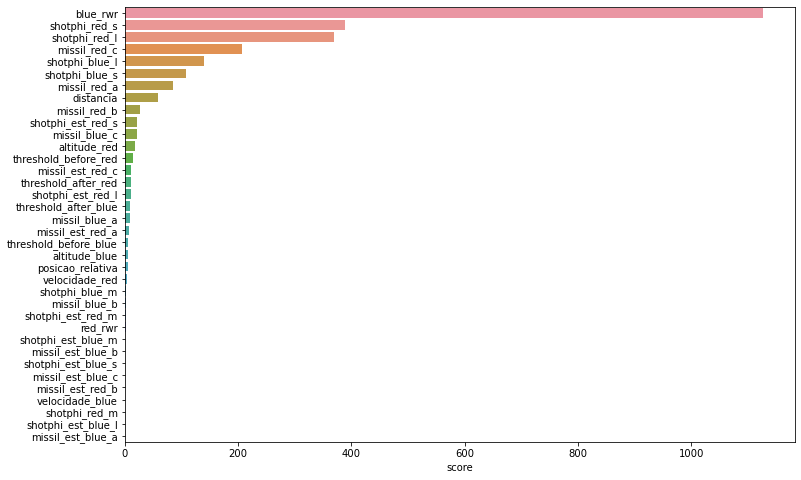

In [46]:
import seaborn as sns

# plot the scores
plt.figure(figsize=(12,8))
sns.barplot(x=scores['score'],y=[i for i in scores['feature']],orient='horizontal' );

### Mutual Information (Defense Model)

In [47]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
     
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [48]:
dic = {}

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %s %f' % (i+1,df.columns[i], fs.scores_[i]))
    dic[df.columns[i]] = fs.scores_[i]

Feature 1: posicao_relativa 0.002283
Feature 2: distancia 0.010045
Feature 3: altitude_blue 0.000000
Feature 4: altitude_red 0.000000
Feature 5: velocidade_blue 0.002633
Feature 6: velocidade_red 0.000000
Feature 7: blue_rwr 0.091484
Feature 8: red_rwr 0.003061
Feature 9: missil_blue_a 0.000000
Feature 10: missil_blue_b 0.001307
Feature 11: missil_blue_c 0.000000
Feature 12: missil_est_red_a 0.000000
Feature 13: missil_est_red_b 0.000000
Feature 14: missil_est_red_c 0.000000
Feature 15: missil_red_a 0.003729
Feature 16: missil_red_b 0.003393
Feature 17: missil_red_c 0.008137
Feature 18: missil_est_blue_a 0.000000
Feature 19: missil_est_blue_b 0.000550
Feature 20: missil_est_blue_c 0.001906
Feature 21: shotphi_blue_s 0.005359
Feature 22: shotphi_blue_m 0.006207
Feature 23: shotphi_blue_l 0.011071
Feature 24: shotphi_est_red_s 0.006990
Feature 25: shotphi_est_red_m 0.005591
Feature 26: shotphi_est_red_l 0.000000
Feature 27: shotphi_red_s 0.036867
Feature 28: shotphi_red_m 0.000631
Featur

In [49]:
import pandas as pd
scores = pd.DataFrame(dic.items(),columns = ['feature', 'score'])    
scores = scores.sort_values('score',ascending=False)

scores

,feature,score
6,blue_rwr,0.091484
26,shotphi_red_s,0.036867
28,shotphi_red_l,0.027372
22,shotphi_blue_l,0.011071
1,distancia,0.010045
16,missil_red_c,0.008137
23,shotphi_est_red_s,0.006990
29,shotphi_est_blue_s,0.006385
21,shotphi_blue_m,0.006207
24,shotphi_est_red_m,0.005591


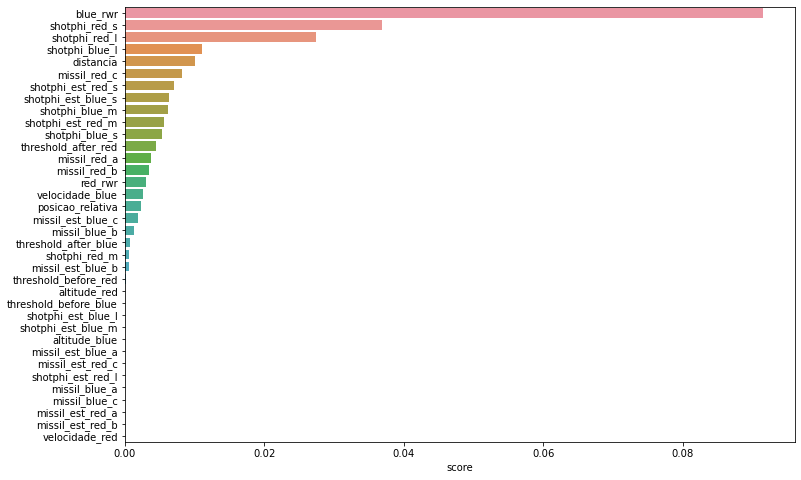

In [50]:
import seaborn as sns

# plot the scores
plt.figure(figsize=(12,8))
sns.barplot(x= scores['score'],y=[i for i in scores['feature']],orient='horizontal' );